In [1]:
from math import sqrt
from random import random, randrange, seed

In [2]:
import matplotlib
import seaborn
import pandas

In [3]:
from models import *
from methods import *

In [4]:
seaborn.set(style="darkgrid")
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.serif"] = ["Times New Roman"]

In [5]:
seed(0)

In [6]:
num_professions = 2  # This is a constant; changing it requires
                     # further code modifications
num_localities = 10
random_samples = 1000

def _distribute_professions_caps_and_jobs(num_agents):
    assert num_agents % num_localities == 0
    
    # Agents are split half-half between professions
    prof1 = num_agents // 2
    prof2 = num_agents - prof1
    professions = [0] * prof1 + [1] * prof2
        
    locality_caps = [num_agents // num_localities] * num_localities

    # Job numbers add up to the cap per locality, but `prof1` jobs
    # for profession 1 and `prof2` jobs for profession 2 are
    # randomly distributed inside these bounds.
    prof1_jobs = prof1  # Remaining jobs to distribute
    prof2_jobs = prof2
    
    job_numbers = []
    for cap in locality_caps:
        p1, p2 = 0, 0
        for _ in range(cap):
            if random() < prof1_jobs / (prof1_jobs + prof2_jobs):
                p1 += 1
                prof1_jobs -= 1
                assert prof1_jobs >= 0
            else:
                p2 += 1
                prof2_jobs -= 1
                assert prof2_jobs >= 0
        job_numbers.append((p1, p2))
        
    return prof1, prof2, professions, locality_caps, job_numbers
    
def test_correction(num_agents):
    _, _, professions, locality_caps, job_numbers = \
        _distribute_professions_caps_and_jobs(num_agents)
    qualification_probabilities = \
        [[random()] * num_localities for _ in range(num_agents)]
    correction_functions = []
    for p1, p2 in job_numbers:
        # The default parameters in the lambdas are never used, but are
        # a way of getting Python's peculiar binding behavior to work.
        # See https://docs.python.org/3/faq/programming.html#why-do-
        # lambdas-defined-in-a-loop-with-different-values-all-return-
        # the-same-result for more information.
        correction_functions.append(
            (lambda x, P1=p1: min(x, P1), lambda x, P2=p2: min(x, P2)))
    model = RetroactiveCorrectionModel(num_agents, locality_caps,
                                       num_professions, professions,
                                       qualification_probabilities,
                                       correction_functions,
                                       random_samples)
    return model

def test_interview(num_agents):
    _, _, professions, locality_caps, job_numbers = \
        _distribute_professions_caps_and_jobs(num_agents)
    compatibility_probabilities = [random() for _ in range(num_agents)]
    model = InterviewModel(num_agents, locality_caps, num_professions,
                           professions, job_numbers,
                           compatibility_probabilities, random_samples)
    return model

def test_coordination(num_agents):
    prof1, prof2, professions, locality_caps, job_numbers = \
        _distribute_professions_caps_and_jobs(num_agents)
    locality_num_jobs = locality_caps
    compatibility_probabilities = []
    for _ in range(prof1):
        competency = random()
        compatibility_probabilities.append(
            [[competency] * p1 + [0.] * p2 for p1, p2 in job_numbers])
    for _ in range(prof2):
        competency = random()
        compatibility_probabilities.append(
            [[0.] * p1 + [competency] * p2 for p1, p2 in job_numbers])
    model = CoordinationModel(num_agents, locality_caps,
                              locality_num_jobs,
                              compatibility_probabilities,
                              random_samples)
    return model

settings = {"correction": test_correction, "interview": test_interview,
            "coordination": test_coordination}

In [7]:
data = []

def sample(setting, num_agents):
    m = settings[setting](num_agents)
    additive = additive_optimization(m)[1]
    greedy = greedy_algorithm(m)[1]
    datum = {}
    datum["number of agents"] = num_agents
    datum["additive"] = additive
    datum["greedy"] = greedy
    if additive > 0.0005:
        datum["greedy / additive"] = greedy / additive
    else:
        datum["greedy / additive"] = None
    datum["model"] = setting
    data.append(datum)
    return datum

In [8]:
from datetime import datetime
for _ in range(5):
    for num_agents in [50, 100, 150, 200]:
        for setting in settings:
            sample(setting, num_agents)
            print(datetime.now(), setting, num_agents, len(data))
from pickle import dumps
dumps(data)

Academic license - for non-commercial use only
2018-08-31 16:10:17.231670 correction 50 1
2018-08-31 16:10:21.000649 interview 50 2
2018-08-31 16:11:45.545130 coordination 50 3
2018-08-31 16:11:51.597949 correction 100 4
2018-08-31 16:12:06.830218 interview 100 5
2018-08-31 16:22:24.507282 coordination 100 6
2018-08-31 16:22:49.882208 correction 150 7
2018-08-31 16:23:59.597587 interview 150 8
2018-08-31 17:16:45.415679 coordination 150 9
2018-08-31 17:17:45.288916 correction 200 10
2018-08-31 17:20:39.528160 interview 200 11
2018-08-31 19:16:54.643997 coordination 200 12
2018-08-31 19:16:56.814660 correction 50 13
2018-08-31 19:17:02.103027 interview 50 14
2018-08-31 19:19:08.291039 coordination 50 15
2018-08-31 19:19:20.935207 correction 100 16
2018-08-31 19:19:53.848974 interview 100 17
2018-08-31 19:36:15.661320 coordination 100 18
2018-08-31 19:36:47.984914 correction 150 19
2018-08-31 19:38:23.704981 interview 150 20
2018-08-31 20:36:28.503895 coordination 150 21
2018-08-31 20:37

b'\x80\x03]q\x00(}q\x01(X\x10\x00\x00\x00number of agentsq\x02K2X\x08\x00\x00\x00additiveq\x03G@9E`A\x897LX\x06\x00\x00\x00greedyq\x04G@=\xb6\x87+\x02\x0cHX\x11\x00\x00\x00greedy / additiveq\x05G?\xf2\xcf\xf9\x07\xcaD\xfbX\x05\x00\x00\x00modelq\x06X\n\x00\x00\x00correctionq\x07u}q\x08(h\x02K2h\x03G@=\xae\x97\x8dO\xdf<h\x04G@AY7K\xc6\xa7\xefh\x05G?\xf2\xb4\x0c\xe7\x13\x0f\x8ah\x06X\t\x00\x00\x00interviewq\tu}q\n(h\x02K2h\x03G@@\xbdO\xdf;dYh\x04G@A\x9eV\x04\x18\x93uh\x05G?\xf0\xd7\x15G\xcb5@h\x06X\x0c\x00\x00\x00coordinationq\x0bu}q\x0c(h\x02Kdh\x03G@IM\x0eV\x04\x18\x93h\x04G@K\x08\x10bM\xd2\xf1h\x05G?\xf1\x18&\xefK}\xe1h\x06h\x07u}q\r(h\x02Kdh\x03G@Po\xae\x14z\xe1Gh\x04G@S8\x83\x12n\x97\x8dh\x05G?\xf2\xb5\xe9|atph\x06h\tu}q\x0e(h\x02Kdh\x03G@Q\xa1x\xd4\xfd\xf3\xb6h\x04G@Tq\xba^5?}h\x05G?\xf2\x8d\xa2\xdcd\xa3\x83h\x06h\x0bu}q\x0f(h\x02K\x96h\x03G@S+\xa5\xe3S\xf7\xcfh\x04G@S\\\x8bC\x95\x81\x06h\x05G?\xf0(\xcf2\xc7,5h\x06h\x07u}q\x10(h\x02K\x96h\x03G@ZKS\xf7\xce\xd9\x17h\x04G@^\xa7\x9d\xb2

In [9]:
def _format_y(ratio):
    return f"{ratio-1:,.0%}"

def plot():
    d = pandas.DataFrame(data)
    g = seaborn.catplot(x="number of agents", y="greedy / additive",
                        hue="model",
                        hue_order=["correction", "interview",
                                   "coordination"],
                        data=d)
    for ax in g.axes[0]:
        vals = ax.get_yticks()
        ax.set_yticklabels([_format_y(x) for x in vals])
        ax.set_ylabel("improvement of greedy over additive")
    g.savefig("num_agents.pdf")
    
def plot_absolute_utilities():
    d = pandas.DataFrame(data)
    g = seaborn.catplot(x="number of agents", y="additive",
                        hue="model",
                        hue_order=["correction", "interview",
                                   "coordination"],
                        data=d)
    g.savefig("num_agents_additive.pdf")
    g = seaborn.catplot(x="number of agents", y="greedy", hue="model",
                        hue_order=["correction", "interview",
                                   "coordination"],
                        data=d)
    g.savefig("num_agents_greedy.pdf")

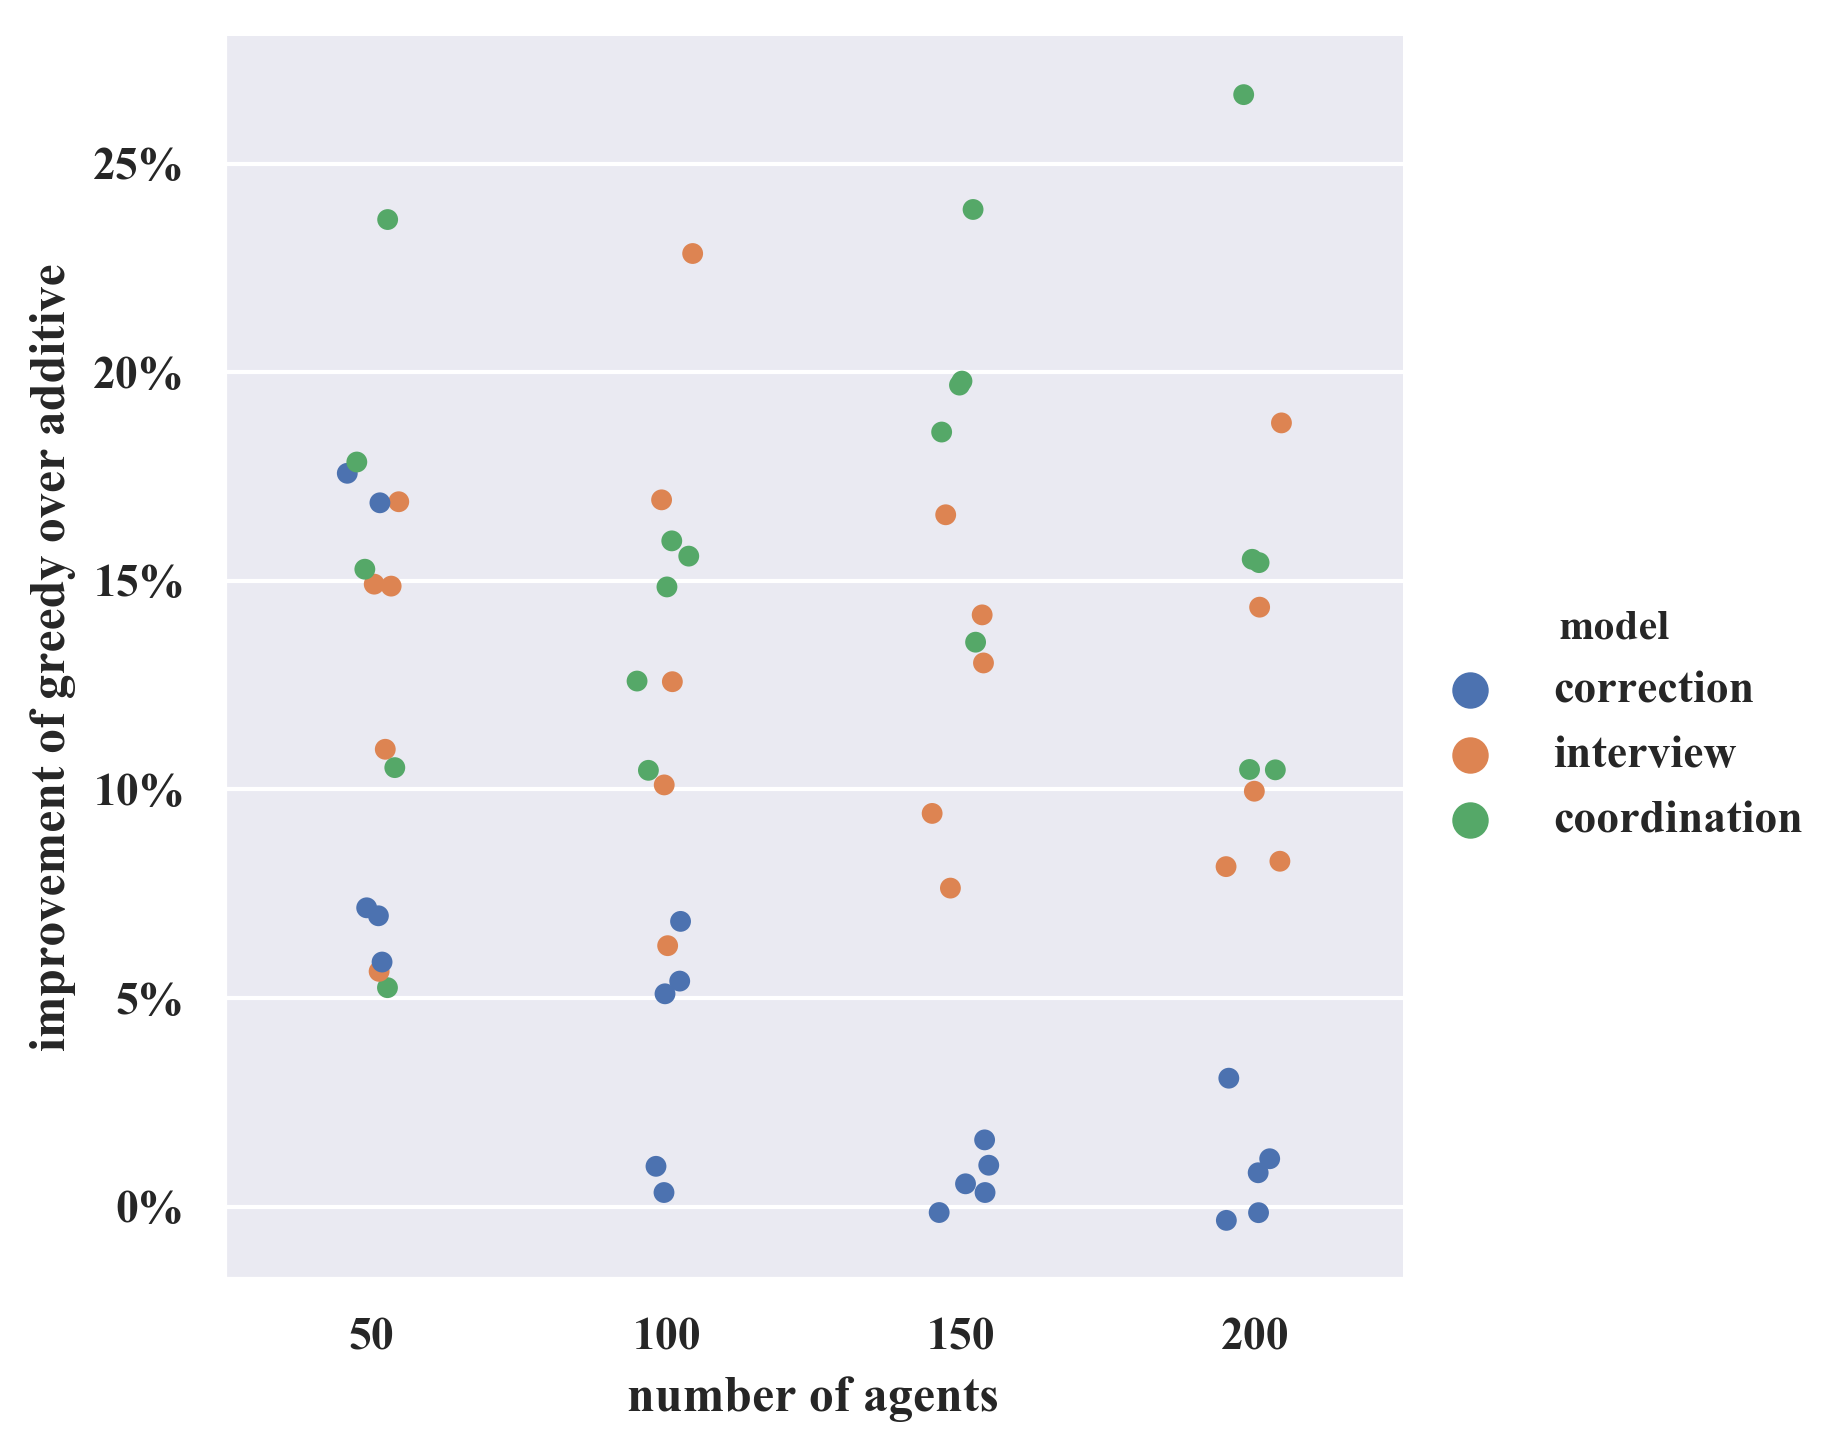

In [10]:
plot()

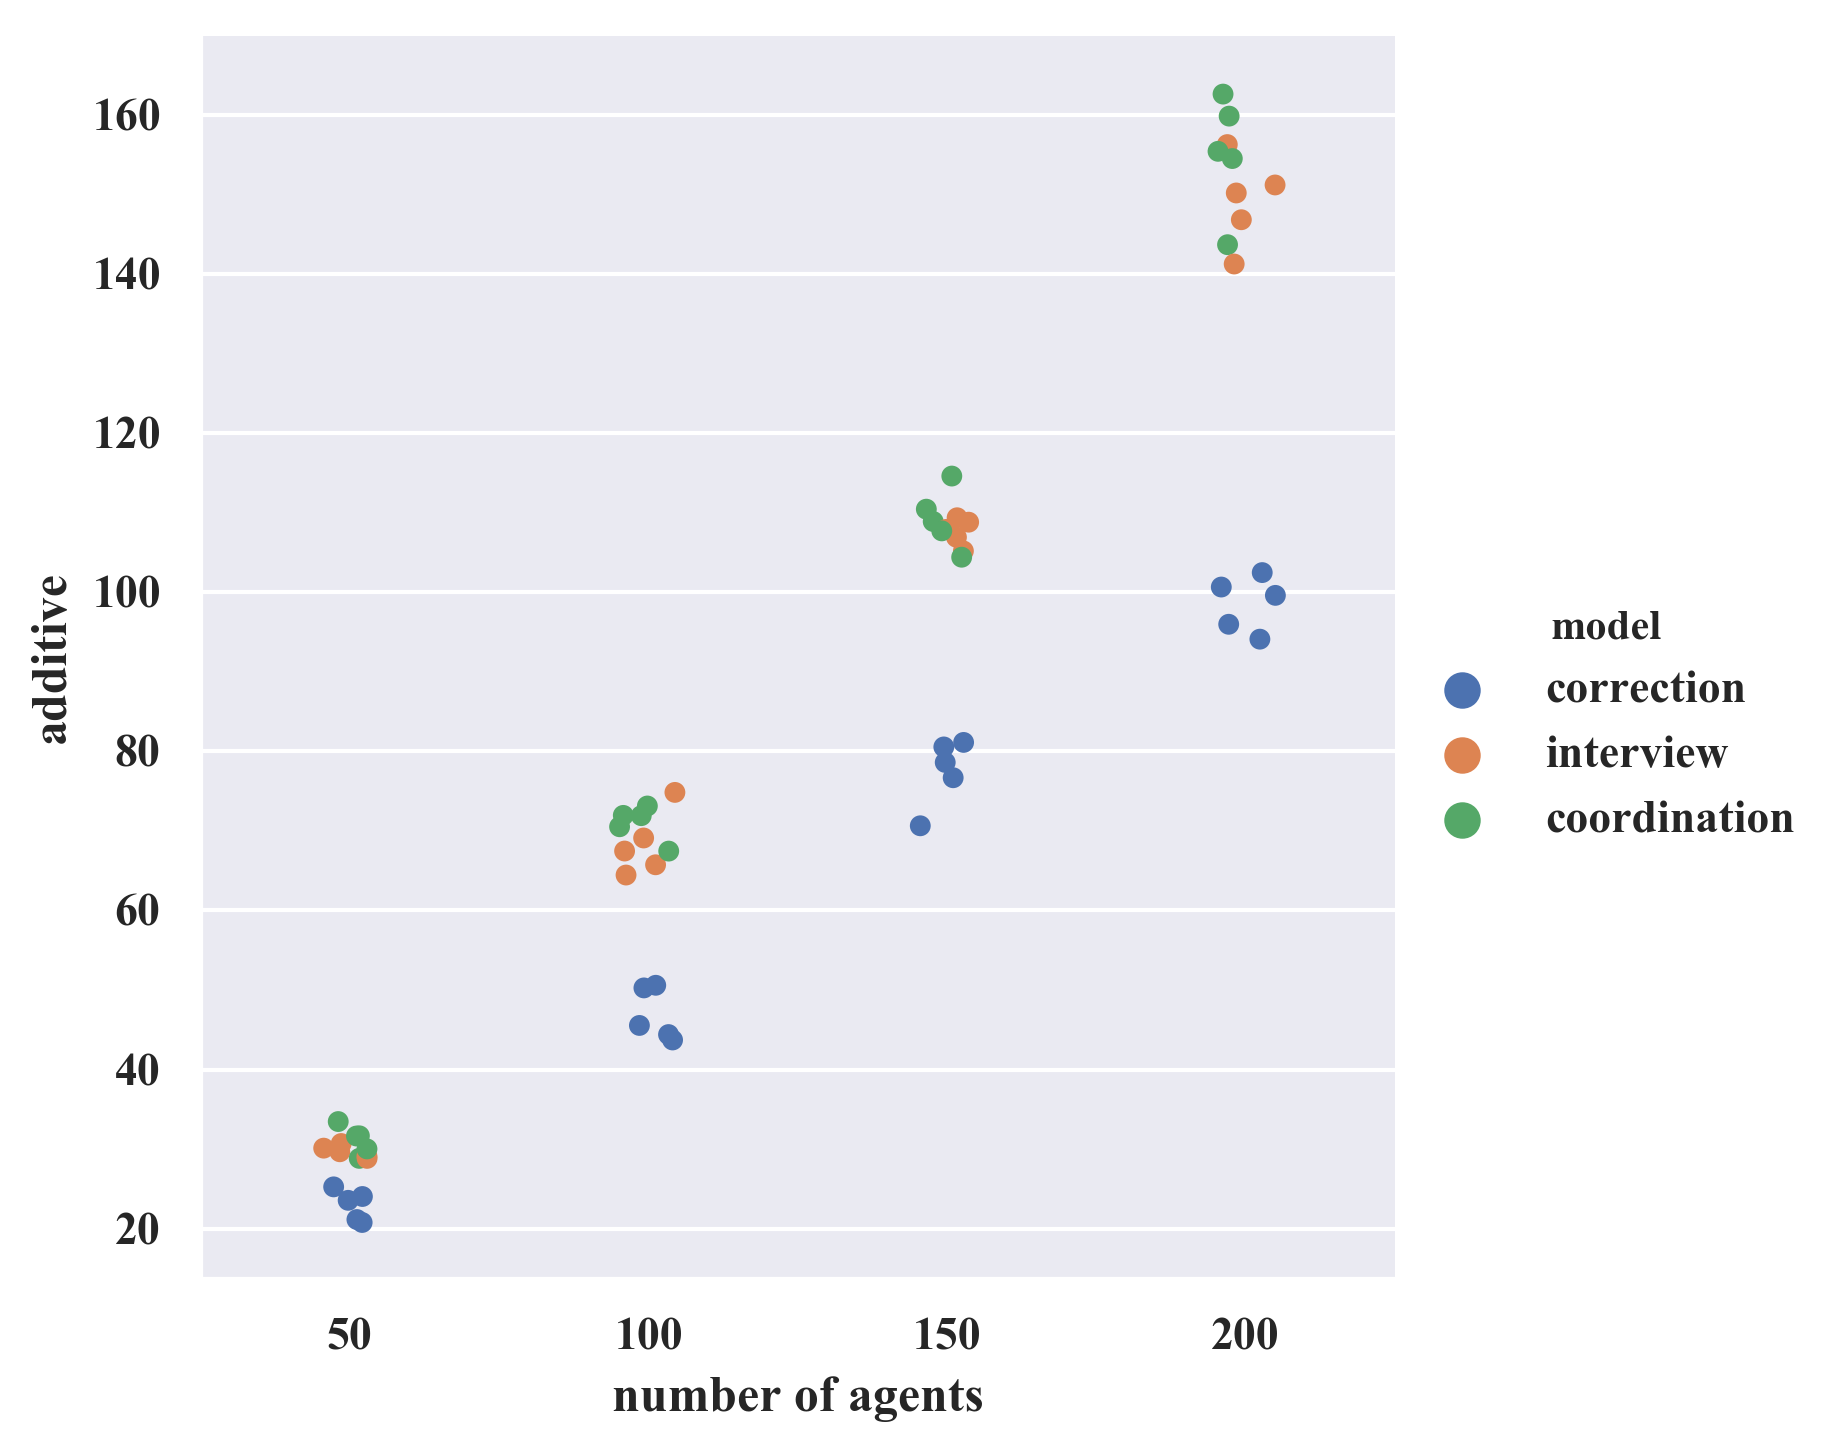

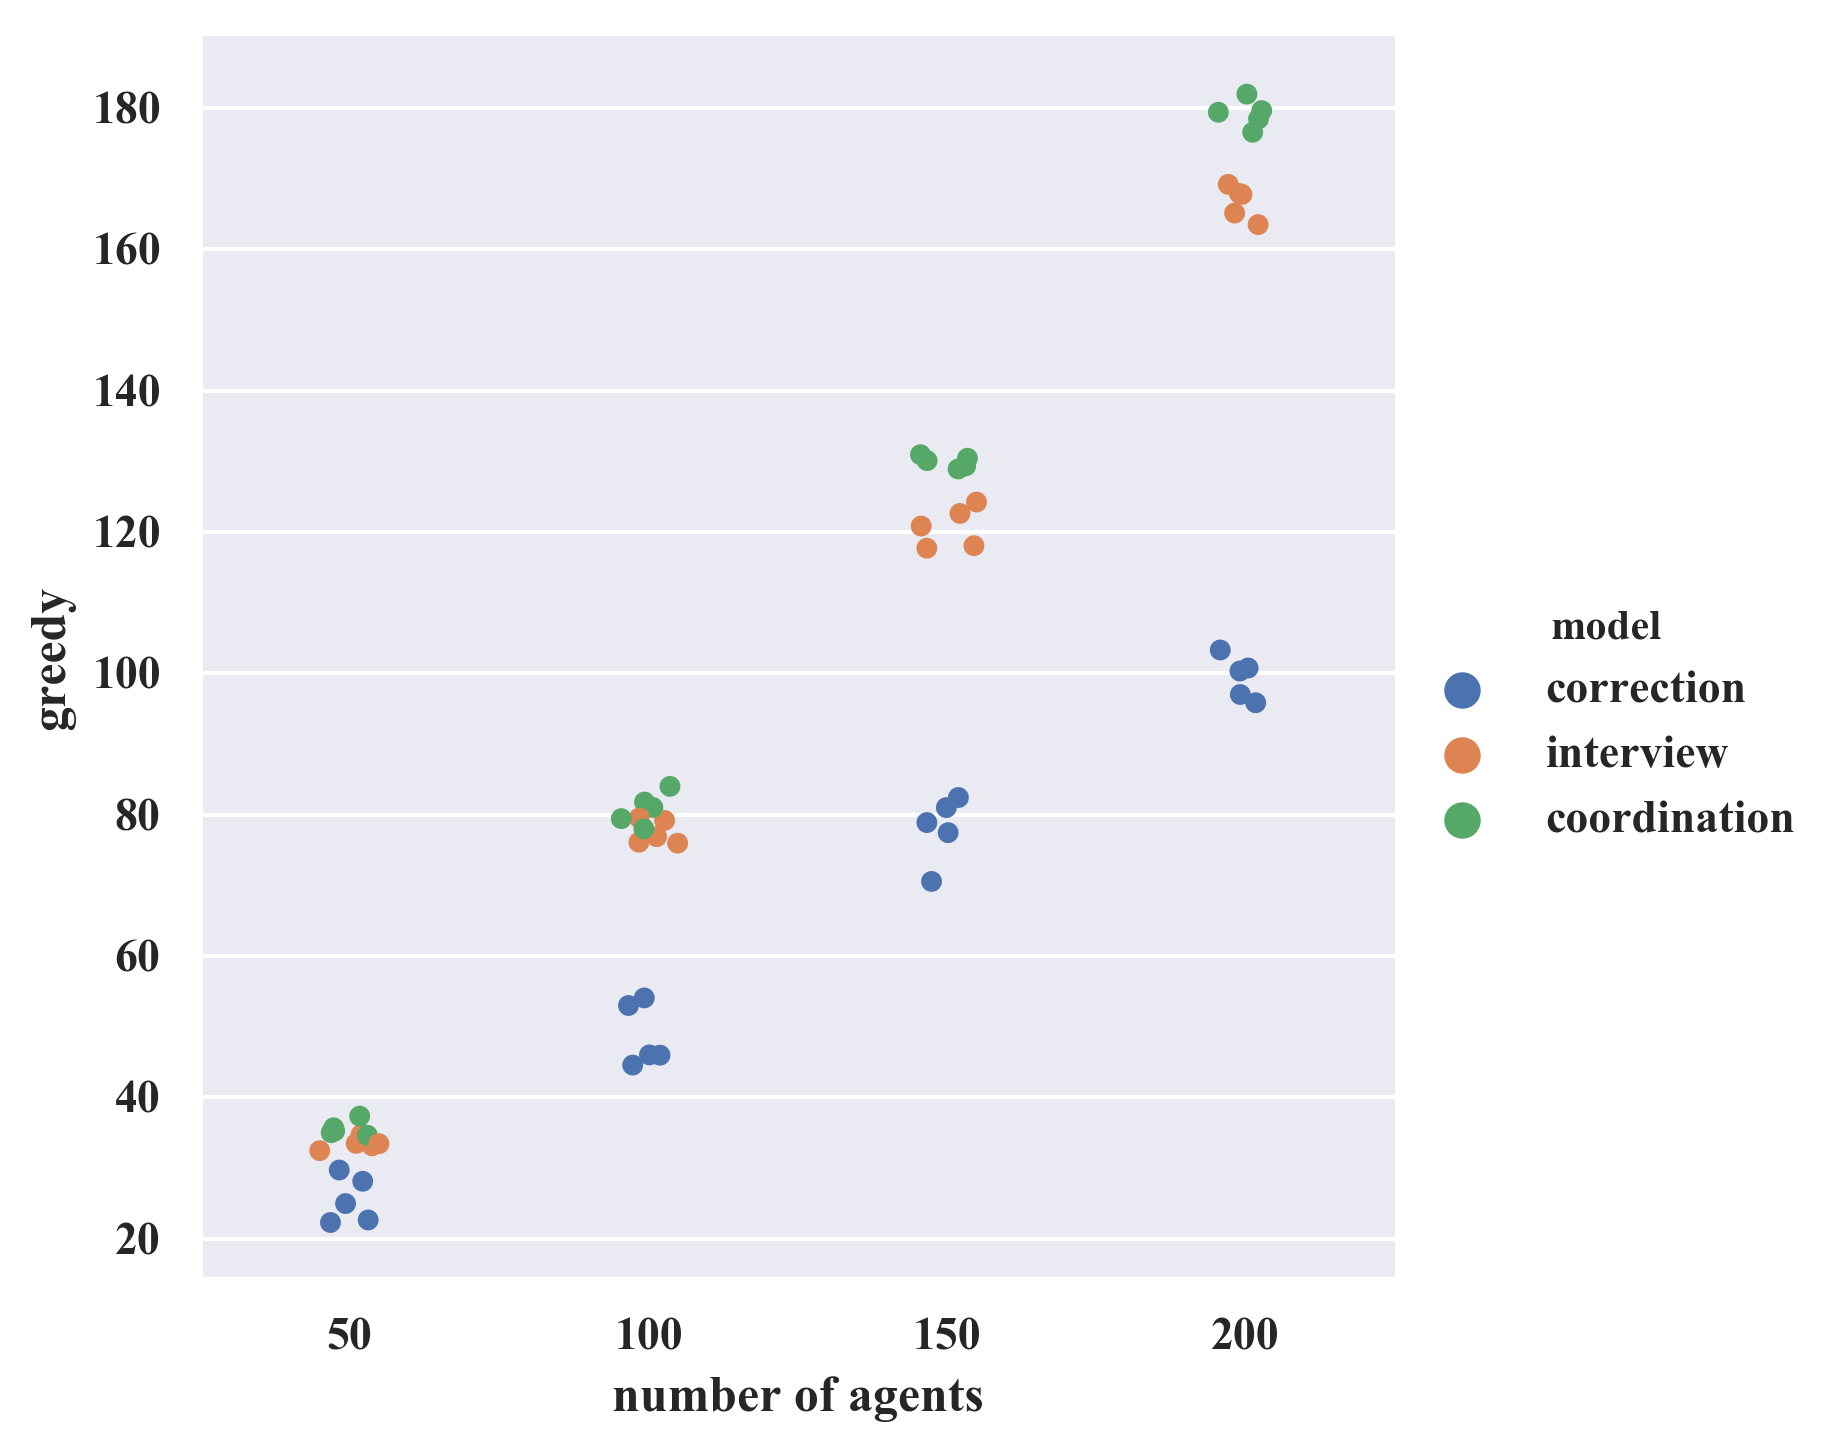

In [11]:
plot_absolute_utilities()